# Janine Par: DSC630 - Week4 ALS Clustering Exercise
 

### Load Libraries Needed

In [2]:
import numpy as np  
import pandas as pd  
import numbers
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import scipy.stats as ss
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

C:\Users\janin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load the ALS Data to Dataframe and Analyze dataset



In [1]:
df_als=pd.read_csv('als_data.csv', index_col=1, encoding='latin-1')  

NameError: name 'pd' is not defined

In [193]:
#Validate the shape

df_als.shape

(2223, 101)

In [194]:
# Spot check data
df_als.head(5)

ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0   1        65         57.0            40.5         38.0       0.066202   
1   2        48         45.0            41.0         39.0       0.010453   
2   3        38         50.0            47.0         45.0       0.008929   
3   4        63         47.0            44.0         41.0       0.012111   
4   5        63         47.0            45.5         42.0       0.008292   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
0     -0.965608                30                 28.0                22   
1     -0.921717                37                 33.0                21   
2     -0.914787                24                 14.0                10   
3     -0.598361                30                 29.0                24   
4     -0.444039                32                 27.5                20   

   ALSFRS_Total_range  ALT.SGPT._max  ALT.SGPT._median  ALT.SGPT._min  \
0            0.021164           24.0              22.0           18.0   
1            0.028725           25.0              13.0            8.0   
2            0.025000           25.0              20.0           14.0   
3            0.014963           62.0              60.0           41.0   
4            0.020374           38.0              26.5           22.0   

   ALT.SGPT._range  AST.SGOT._max  AST.SGOT._median  AST.SGOT._min  \
0         0.020906             31              27.5           23.0   
1         0.029617             31              17.0           14.0   
2         0.019643             24              19.0           18.0   
3         0.052369             46              40.0           33.0   
4         0.026534             35              26.5           20.0   

   AST.SGOT._range  Bicarbonate_max  Bicarbonate_median  Bicarbonate_min  \
0         0.027875             30.0                28.0             25.0   
1         0.029617             32.0                28.0             25.0   
2         0.010714             35.0                29.0             24.0   
3         0.032419             23.0                20.0             20.0   
4         0.024876             32.0                28.0             23.0   

   Bicarbonate_range  Blood.Urea.Nitrogen..BUN._max  \
0           0.017422                         8.0322   
1           0.012195                         8.3973   
2           0.019643                         5.4765   
3           0.007481                         8.0322   
4           0.014925                         5.1114   

   Blood.Urea.Nitrogen..BUN._median  Blood.Urea.Nitrogen..BUN._min  \
0                           7.11945                         6.5718   
1                           4.74630                         4.0161   
2                           4.38120                         3.6510   
3                           8.03220                         6.5718   
4                           4.19865                         3.6510   

   Blood.Urea.Nitrogen..BUN._range  bp_diastolic_max  bp_diastolic_median  \
0                         0.005089                90                 83.0   
1                         0.007633                80                 78.0   
2                         0.003260                86                 76.0   
3                         0.003642                90                 80.0   
4                         0.002422               100                 80.0   

   bp_diastolic_min  bp_diastolic_range  bp_systolic_max  bp_systolic_median  \
0                69            0.055556              160               139.0   
1                64            0.028725              140               132.5   
2                58            0.050000              120               110.0   
3                70            0.049875              150               130.0   
4                68            0.053068              160               130.0   

   bp_systolic_min  bp_systolic_range  Calcium_max  Calcium_median  \
0     

In [195]:
#Check null values 
df_als.isna().sum().any()

False

 Identify categorical and numeric variables

In [196]:
cat_var = df_als.select_dtypes(exclude=np.number)
nume_var = df_als.select_dtypes(include=np.number)
nume_var.head ()

ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0   1        65         57.0            40.5         38.0       0.066202   
1   2        48         45.0            41.0         39.0       0.010453   
2   3        38         50.0            47.0         45.0       0.008929   
3   4        63         47.0            44.0         41.0       0.012111   
4   5        63         47.0            45.5         42.0       0.008292   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
0     -0.965608                30                 28.0                22   
1     -0.921717                37                 33.0                21   
2     -0.914787                24                 14.0                10   
3     -0.598361                30                 29.0                24   
4     -0.444039                32                 27.5                20   

   ALSFRS_Total_range  ALT.SGPT._max  ALT.SGPT._median  ALT.SGPT._min  \
0            0.021164           24.0              22.0           18.0   
1            0.028725           25.0              13.0            8.0   
2            0.025000           25.0              20.0           14.0   
3            0.014963           62.0              60.0           41.0   
4            0.020374           38.0              26.5           22.0   

   ALT.SGPT._range  AST.SGOT._max  AST.SGOT._median  AST.SGOT._min  \
0         0.020906             31              27.5           23.0   
1         0.029617             31              17.0           14.0   
2         0.019643             24              19.0           18.0   
3         0.052369             46              40.0           33.0   
4         0.026534             35              26.5           20.0   

   AST.SGOT._range  Bicarbonate_max  Bicarbonate_median  Bicarbonate_min  \
0         0.027875             30.0                28.0             25.0   
1         0.029617             32.0                28.0             25.0   
2         0.010714             35.0                29.0             24.0   
3         0.032419             23.0                20.0             20.0   
4         0.024876             32.0                28.0             23.0   

   Bicarbonate_range  Blood.Urea.Nitrogen..BUN._max  \
0           0.017422                         8.0322   
1           0.012195                         8.3973   
2           0.019643                         5.4765   
3           0.007481                         8.0322   
4           0.014925                         5.1114   

   Blood.Urea.Nitrogen..BUN._median  Blood.Urea.Nitrogen..BUN._min  \
0                           7.11945                         6.5718   
1                           4.74630                         4.0161   
2                           4.38120                         3.6510   
3                           8.03220                         6.5718   
4                           4.19865                         3.6510   

   Blood.Urea.Nitrogen..BUN._range  bp_diastolic_max  bp_diastolic_median  \
0                         0.005089                90                 83.0   
1                         0.007633                80                 78.0   
2                         0.003260                86                 76.0   
3                         0.003642                90                 80.0   
4                         0.002422               100                 80.0   

   bp_diastolic_min  bp_diastolic_range  bp_systolic_max  bp_systolic_median  \
0                69            0.055556              160               139.0   
1                64            0.028725              140               132.5   
2                58            0.050000              120               110.0   
3                70            0.049875              150               130.0   
4                68            0.053068              160               130.0   

   bp_systolic_min  bp_systolic_range  Calcium_max  Calcium_median  \
0     

In [197]:
categorical.head ()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

# 1. Remove any data that is not relevant to the patient’s ALS condition.


Dropping ID and Subject ID since they are features that will not impact the model

In [198]:

df_als.drop(columns = ['ID', 'SubjectID'], inplace = True)
df_als.shape

(2223, 99)

Feature reduction by removing the highest correlated data elements using .90 as threshold which have removed 4 features. 
Correlated variables may increase the weight of the clusters that they belong to, and make them more distinct from other clusters. This may introduce bias if correlation is irrelevant.

In [199]:
import numpy as np

# Create correlation matrix
corr_matrix = df_als.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
to_drop
df_als.drop(to_drop, axis=1, inplace=True)


In [200]:
df_als.shape

(2223, 95)

# 2. Apply a standard scalar to the data.
This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1:


In [201]:
from sklearn import preprocessing

In [202]:
scaler = preprocessing.StandardScaler()
scaled_feature = scaler.fit_transform(df_als.values)

Validate Data

In [203]:
df_als_scaled = pd.DataFrame(scaled_feature, index=df_als.index, columns=df_als.columns)
df_als_scaled.head()

Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0  0.917137     3.089417       -1.300781    -0.866550       5.480929   
1 -0.574879    -0.622016       -1.112401    -0.553303      -0.347725   
2 -1.452535     0.924415        1.148162     1.326179      -0.507103   
3  0.741606    -0.003443        0.017880     0.073191      -0.174361   
4  0.741606    -0.003443        0.583021     0.386438      -0.573670   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  \
0     -0.381450         -0.318520             0.134960          0.247368   
1     -0.310907          0.998995             0.888863          0.130839   
2     -0.299769         -1.447819            -1.975969         -1.150976   
3      0.208801         -0.318520             0.285741          0.480425   
4      0.456831          0.057913             0.059570          0.014311   

   ALSFRS_Total_range  ALT.SGPT._max  ALT.SGPT._median  ALT.SGPT._min  \
0           -0.301588      -0.679085         -0.704767      -0.446606   
1            0.166537      -0.656774         -1.281749      -1.337181   
2           -0.064100      -0.656774         -0.832985      -0.802836   
3           -0.685524       0.168760          1.731378       1.601718   
4           -0.350529      -0.366721         -0.416276      -0.090376   

   ALT.SGPT._range  AST.SGOT._max  AST.SGOT._median  AST.SGOT._min  \
0        -0.453087      -0.343750         -0.164404       0.197134   
1        -0.374515      -0.343750         -1.259094      -1.020129   
2        -0.464480      -0.542158         -1.050582      -0.479123   
3        -0.169287       0.081411          1.138799       1.549648   
4        -0.402321      -0.230374         -0.268660      -0.208621   

   AST.SGOT._range  Bicarbonate_max  Bicarbonate_median  Bicarbonate_min  \
0        -0.253516        -0.283619            0.471374         0.762330   
1        -0.232796         0.348541            0.471374         0.762330   
2        -0.457607         1.296780            0.926265         0.347043   
3        -0.199469        -2.496176           -3.167753        -1.314102   
4        -0.289183         0.348541            0.471374        -0.068243   

   Bicarbonate_range  Blood.Urea.Nitrogen..BUN._max  \
0           0.049077                       0.292860   
1          -0.414378                       0.450297   
2           0.246046                      -0.809203   
3          -0.832374                       0.292860   
4          -0.172274                      -0.966640   

   Blood.Urea.Nitrogen..BUN._median  Blood.Urea.Nitrogen..BUN._min  \
0                          1.169674                       1.780659   
1                         -0.608052                      -0.106928   
2                         -0.881549                      -0.376583   
3                          1.853414                       1.780659   
4                         -1.018297                      -0.376583   

   Blood.Urea.Nitrogen..BUN._range  bp_diastolic_max  bp_diastolic_median  \
0                        -0.403233         -0.231902             0.260444   
1                         0.098656         -1.373942            -0.429788   
2                        -0.763966         -0.688718            -0.705880   
3                        -0.688597         -0.231902            -0.153695   
4                        -0.929260          0.910139            -0.153695   

   bp_diastolic_min  bp_diastolic_range  bp_systolic_max  bp_systolic_median  \
0         -0.105510            0.289532         0.816774            0.774854   
1         -0.697803           -0.694129        -0.453027            0.240235   
2         -1.408555            0.085852        -1.722828           -1.610367   
3          0.012949            0.081281         0.181873            0.034613   
4         -0.223968            0.198332         0.816774            0.034613   

   bp_systolic_min  bp_systolic_range  Calcium_max  Calcium_median  \
0         1.391144           0

# 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.


In [204]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA


This loops through values of k (2-15)  and compute the silhouette coefficient:

In [205]:
range_n_clusters = list(range(2, 15))
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(scaled_feature)
 cluster_labels = kmeans.labels_
 
 # silhouette score df_als_scaled features
 silhouette_avg.append(silhouette_score(scaled_feature, cluster_labels))


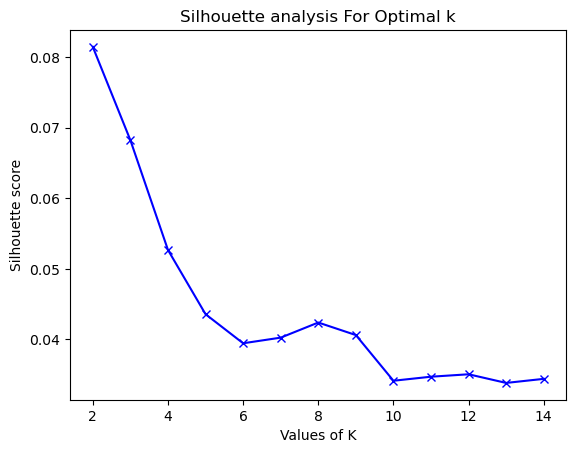

In [206]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# 4. Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

  
 Plotting the average silhouette scores for each k shows that the best choice for <b>  k is 2 </b>  since it has the highest silhouette score:


# 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).


The Red and Blue clusters below seem to have overlap and the not clearly separated even when using the k = 2

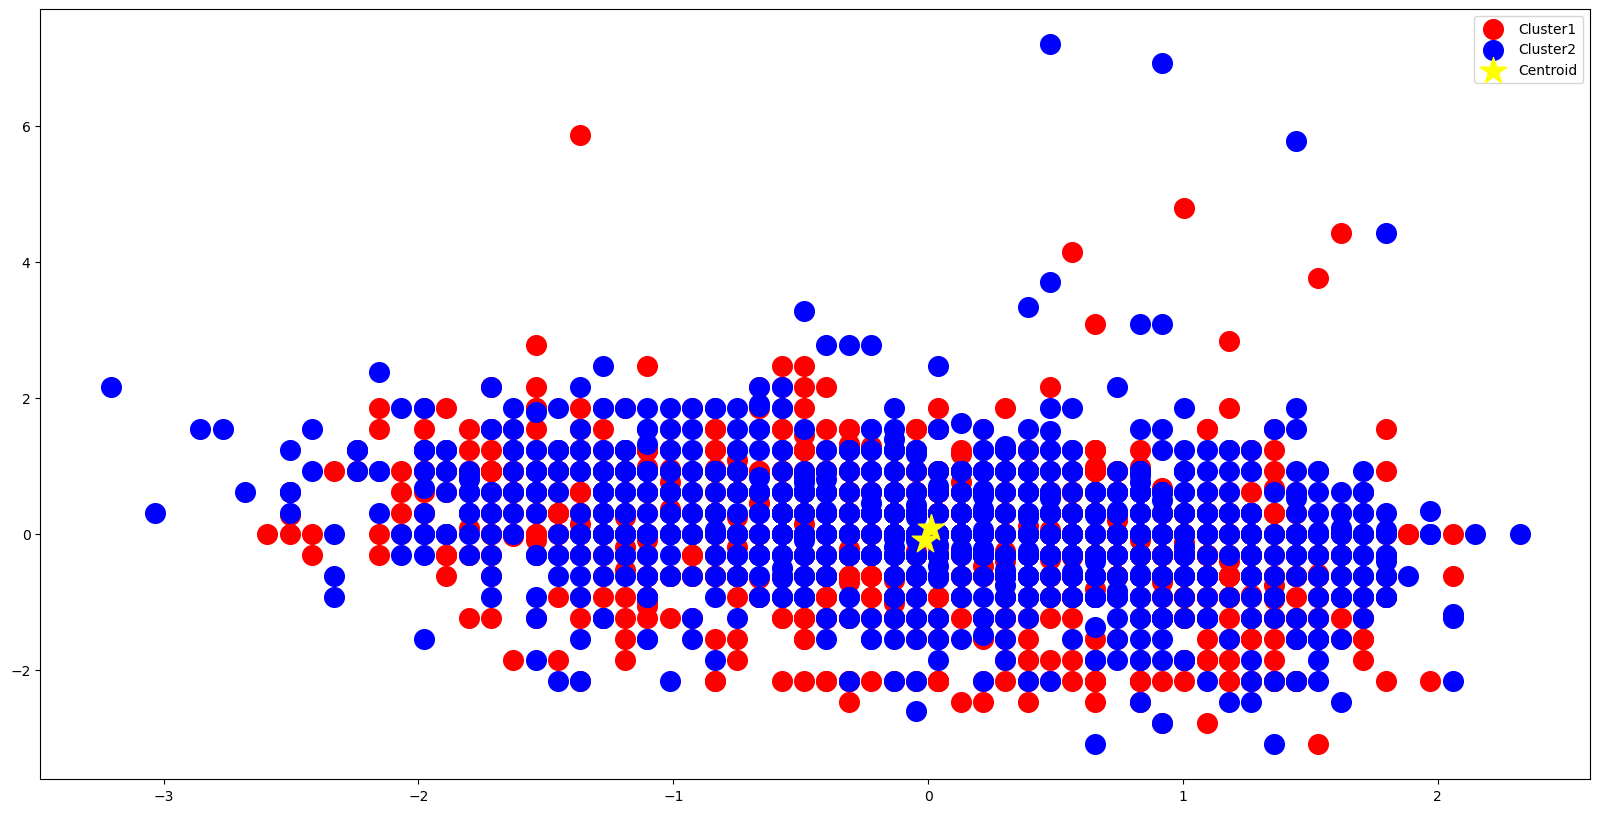

In [207]:
Kmeans = KMeans(n_clusters = 2,                 # Set to optimal cluster =2 
                init = 'k-means++',             # Initialization 
                max_iter = 300,                 # Maximum num of iterations
                n_init = 10,                    #  how often algorithm will run with different centroid
                random_state = 0)               # Random state for reproducibility

y_Kmeans = Kmeans.fit_predict(scaled_feature)

plt.figure(figsize = (20,10))

#Plot the clusters and centroids
plt.scatter(scaled_feature[y_Kmeans == 0, 0], 
            scaled_feature[y_Kmeans == 0, 1], 
            s = 200, c = 'red', label = 'Cluster1')
plt.scatter(scaled_feature[y_Kmeans == 1, 0],
            scaled_feature[y_Kmeans == 1, 1], 
            s = 200, c = 'blue', label = 'Cluster2')

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], 
            s=400,                             
            c='yellow',
            label = 'Centroid',
            marker = "*")                         

plt.legend()
plt.show()

In [208]:
score = silhouette_score(scaled_feature, y_Kmeans, metric='euclidean')
print(score)

0.08140640561048122


# 6. Fit a PCA transformation with two features to the scaled data.

Perform PCA with the chosen number of components=2


In [209]:
scaled_pca = PCA(n_components=2).fit(df_als_scaled.values)
scaled_pca_feature = scaled_pca.transform(df_als_scaled.values)

In [210]:
scaled_pca_feature

array([[-1.81655218,  1.46123084],
       [-1.71149995, -1.25982109],
       [ 1.56352824, -3.55430833],
       ...,
       [-0.26677335, -0.04996746],
       [-0.11164215,  1.47319157],
       [ 1.28715739,  4.26045586]])

# 7. Make a scatterplot the PCA transformed data coloring each point by its cluster value.


Red and Blue clusters are clearly separated when using PCA Transformed Data

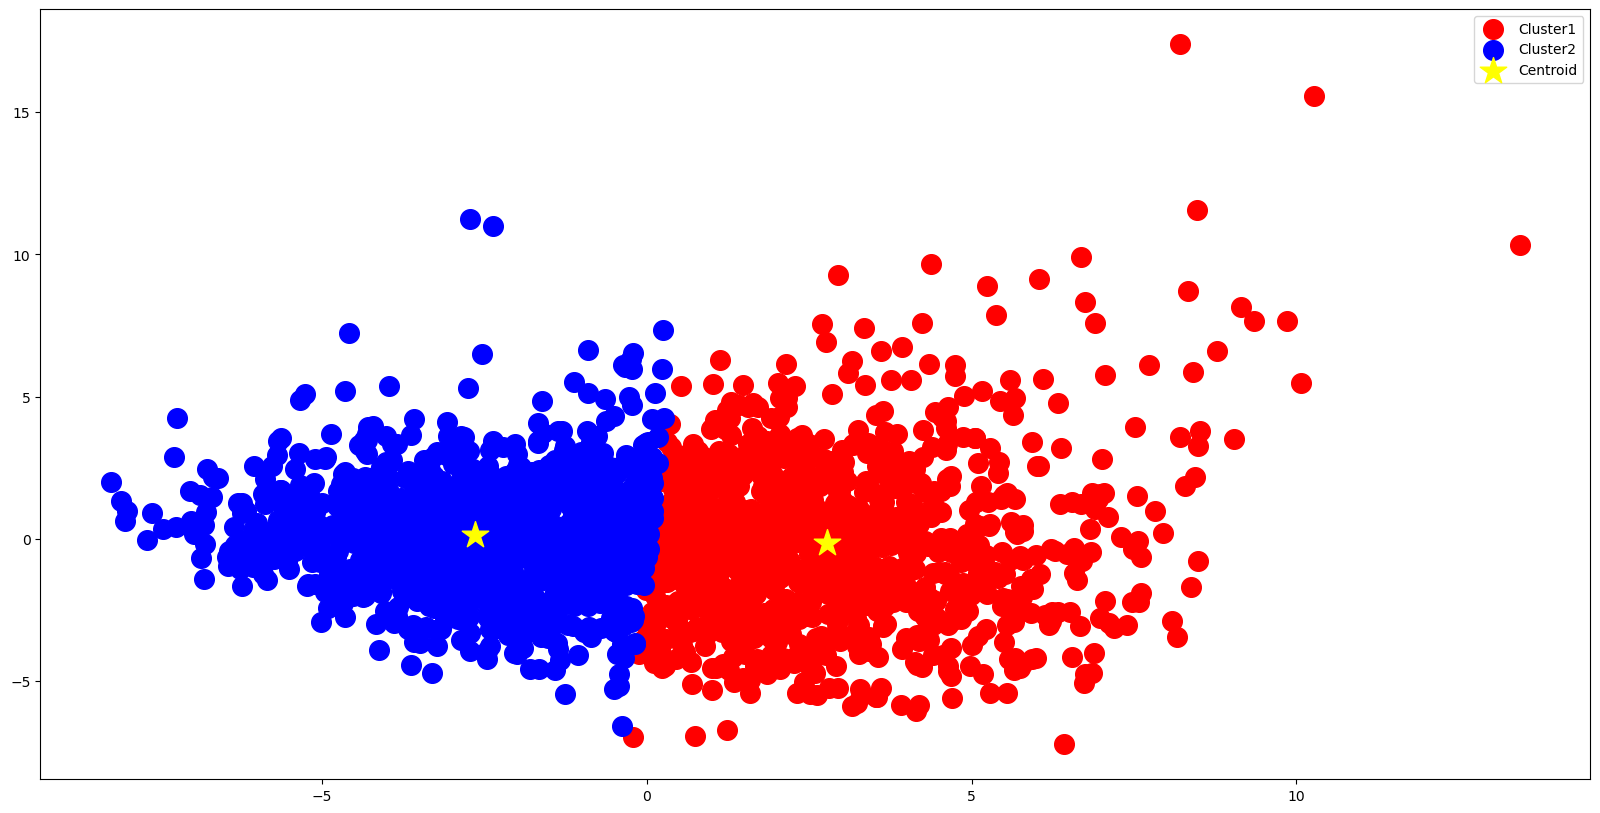

In [211]:
Kmeans = KMeans(n_clusters = 2,                 # Set amount of clusters
                init = 'k-means++',             # Initialization 
                max_iter = 300,                 # Maximum num of iterations
                n_init = 10,                    #  how often algorithm will run with different centroid
                random_state = 0)               # Random state for reproducibility

y_Kmeans = Kmeans.fit_predict(scaled_pca_feature)

plt.figure(figsize = (20,10))

#PLot the clusters and centroid
plt.scatter(scaled_pca_feature[y_Kmeans == 0, 0], 
            scaled_pca_feature[y_Kmeans == 0, 1], 
            s = 200, c = 'red', label = 'Cluster1')
plt.scatter(scaled_pca_feature[y_Kmeans == 1, 0], 
            scaled_pca_feature[y_Kmeans == 1, 1], 
            s = 200, c = 'blue', label = 'Cluster2')

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], 
            s=400,                             
            c='yellow',
            label = 'Centroid',
            marker = "*")                         

plt.legend()
plt.show()

In [212]:
score = silhouette_score(scaled_feature, y_Kmeans, metric='euclidean')
print(score)

0.08218190537708846


# 9. Summary and Conclusion. 


In this K-means clustering exercise on ALS dataset, Here are my findings:

* Standard scaling is important as we want to treat all the features equally and we can achieve this by transforming the features to a values that fall within the same numerical range. 


* Based on the silhouette v.s number of clusters for <b> Standard Scaled ALS dataset</b> , the best choice for <b> K = 2 </b>  because it shows the highest silhouette score. However, I still observed that there are overlap between two clusters. The blue and red segment are not that clearly separated even after reducing a few highly correlated features. 


* After fitting the <b> scaled dataset to PCA (with 2 features) and runnig it to K-means (n_cluster=2) </b> , the Red and Blue segments are clearly separated which means that PCA has reduced the noise and redundancy in the data and shows a more improved quality of the clusters. 